In [1]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
from numpy import median, std

from math import pi


def create_plot(data: list, names: list, to_plot: list = [], to_plot_colors: list = [],
                labels: list = [], filename: str = None) -> tuple:

    if len(data) != len(names):
        raise ValueError(
            'Length of names does not match length of data: {}, {}'.format(
                len(names), len(data)
            )
        )
    plt.clf()
    data_normalized = []
    norm_params = []
    for variable in data:
        min_val = min(variable)
        max_val = max(variable)
        data_normalized.append(
            [(v - min_val) / (max_val - min_val) for v in variable]
        )
        norm_params.append((min_val, max_val))
    norm_params.append(norm_params[0])
    median_values = [median(variable) for variable in data_normalized]
    std_plus = [median_values[i] + std(variable)
                for i, variable in enumerate(data_normalized)]
    std_minus = [median_values[i] - std(variable)
                 for i, variable in enumerate(data_normalized)]
    for idx, val in enumerate(std_minus):
        if val < 0:
            std_minus[idx] = 0

    plot_median_vals = median_values[:] + median_values[:1]
    plot_stdp_vals = std_plus[:] + std_plus[:1]
    plot_stdm_vals = std_minus[:] + std_minus[:1]

    angles = [n / float(len(median_values)) * 2 * pi
              for n in range(len(median_values))]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], names, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks(color='grey', size=7)
    plt.ylim(0.0, max(plot_stdp_vals) + 0.1)
    ax.plot(angles, plot_median_vals, linewidth=1, linestyle='dotted',
            color=(0, 114/235, 178/235))
    ax.fill(angles, plot_stdp_vals, color=(0, 114/235, 178/235), alpha=0.2)
    ax.fill(angles, plot_stdm_vals, 'white', alpha=1.0)

    if len(to_plot_colors) > 0:
        to_plot_colors.append(to_plot_colors[0])
    for idx, comp in enumerate(to_plot):
        _tp = []
        for i in range(len(comp)):
            _tp.append(max((comp[i] - norm_params[i][0]) / (norm_params[i][1] - norm_params[i][0]), 0))
        _tp.append(_tp[0])
        ax.plot(angles, _tp, linewidth=1, linestyle='solid', color=to_plot_colors[idx], alpha=1.0)
    if len(labels) > 0:
        labelstr = ''
        for l in labels:
            labelstr += l + '\n'
        text_box = AnchoredText(labelstr, frameon=True, loc='lower right',
                                pad=0.0)
        plt.setp(text_box.patch, facecolor='white', edgecolor='w')
        plt.gca().add_artist(text_box)
    if filename is not None:
        plt.savefig(filename, dpi=250)
    plt.show()


In [2]:
import json
from ecnet.datasets import load_cp

def get_property(compounds: list, property: str, lim: int = None) -> tuple:

    prop_vals = []
    smiles = []
    for c in compounds:
        try:
            _val = [float(c['properties'][property]['value'])]
        except KeyError:
            continue
        if lim is not None:
            if _val[0] > lim:
                continue
        prop_vals.append(_val)
        smiles.append(c['canonical_smiles'])
    return (prop_vals, smiles)


with open('compounds.json', 'r') as jfile:
    compounds = json.load(jfile)
jfile.close()

cn, smiles_cn = get_property(compounds, 'cetane_number', 100)
ysi, smiles_ysi = get_property(compounds, 'ysi_unified')
lhv, smiles_lhv = get_property(compounds, 'lower_heating_value')
kv, smiles_kv = get_property(compounds, 'kinematic_viscosity')
smiles_cp, cp = load_cp()
fp, smiles_fp = get_property(compounds, 'flash_point')

print(len(cn), len(ysi), len(lhv), len(kv), len(cp), len(fp))

391 545 385 205 43 255


In [3]:
from alvadescpy import smiles_to_descriptors

desc_cn = [smiles_to_descriptors(smi, ['SpMaxA_EA(ed)', 'PHI', 'X5Av', 'S3K', 'SssCH2'], False) for smi in smiles_cn]
desc_ysi = [smiles_to_descriptors(smi, ['SM6_B(p)', 'SpMax1_Bh(p)', 'piPC05', 'piID', 'piPC04'], False) for smi in smiles_ysi]
desc_kv = [smiles_to_descriptors(smi, ['SsOH', 'Psi_i_t', 'SpPos_B(s)', 'VE1sign_Dz(p)', 'SpAD_B(s)'], False) for smi in smiles_kv]
desc_cp = [smiles_to_descriptors(smi, ['VE2sign_Dz(i)', 'GATS2e', 'VE2sign_Dz(m)', 'VE2sign_Dz(e)', 'VE2sign_Dz(Z)'], False) for smi in smiles_cp]
desc_lhv = [smiles_to_descriptors(smi, ['O%', 'Me', 'Eta_epsi_4', 'Eta_D_epsiC', 'IC0'], False) for smi in smiles_lhv]
desc_fp = [smiles_to_descriptors(smi, ['SpAD_B(s)', 'SpAbs_B(s)', 'GMTIV', 'ATSC1e', 'HyWi_B(s)'], False) for smi in smiles_fp]

In [4]:
import numpy as np

for i, d in enumerate(desc_cn):
    for j, c in enumerate(d):
        if c == 'na':
            desc_cn[i][j] = 0.0
for i, d in enumerate(desc_ysi):
    for j, c in enumerate(d):
        if c == 'na':
            desc_ysi[i][j] = 0.0
for i, d in enumerate(desc_kv):
    for j, c in enumerate(d):
        if c == 'na':
            desc_kv[i][j] = 0.0
for i, d in enumerate(desc_cp):
    for j, c in enumerate(d):
        if c == 'na':
            desc_cp[i][j] = 0.0
for i, d in enumerate(desc_lhv):
    for j, c in enumerate(d):
        if c == 'na':
            desc_lhv[i][j] = 0.0
for i, d in enumerate(desc_fp):
    for j, c in enumerate(d):
        if c == 'na':
            desc_fp[i][j] = 0.0

desc_cn = np.array([[float(desc_cn[i][j]) for i in range(len(desc_cn))] for j in range(5)])
desc_ysi = np.array([[float(desc_ysi[i][j]) for i in range(len(desc_ysi))] for j in range(5)])
desc_kv = np.array([[float(desc_kv[i][j]) for i in range(len(desc_kv))] for j in range(5)])
desc_cp = np.array([[float(desc_cp[i][j]) for i in range(len(desc_cp))] for j in range(5)])
desc_lhv = np.array([[float(desc_lhv[i][j]) for i in range(len(desc_lhv))] for j in range(5)])
desc_fp = np.array([[float(desc_fp[i][j]) for i in range(len(desc_fp))] for j in range(5)])

print(desc_cn.shape, desc_ysi.shape, desc_kv.shape, desc_cp.shape, desc_lhv.shape, desc_fp.shape)

(5, 391) (5, 545) (5, 205) (5, 43) (5, 385) (5, 255)


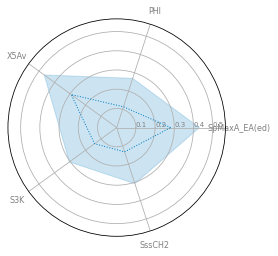

In [5]:
create_plot(desc_cn, ['SpMaxA_EA(ed)', 'PHI', 'X5Av', 'S3K', 'SssCH2'], filename='plots/radar/cn_base.png')

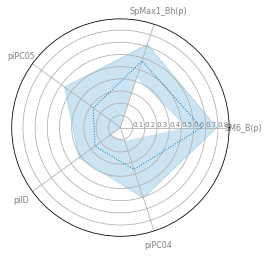

In [6]:
create_plot(desc_ysi, ['SM6_B(p)', 'SpMax1_Bh(p)', 'piPC05', 'piID', 'piPC04'], filename='plots/radar/ysi_base.png')

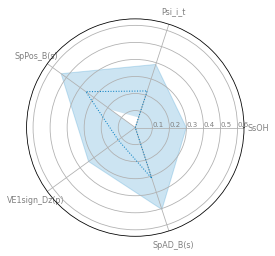

In [7]:
create_plot(desc_kv, ['SsOH', 'Psi_i_t', 'SpPos_B(s)', 'VE1sign_Dz(p)', 'SpAD_B(s)'], filename='plots/radar/kv_base.png')

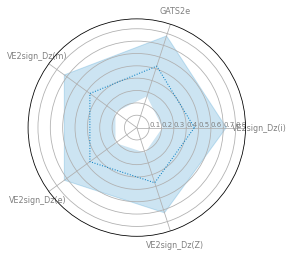

In [8]:
create_plot(desc_cp, ['VE2sign_Dz(i)', 'GATS2e', 'VE2sign_Dz(m)', 'VE2sign_Dz(e)', 'VE2sign_Dz(Z)'], filename='plots/radar/cp_base.png')

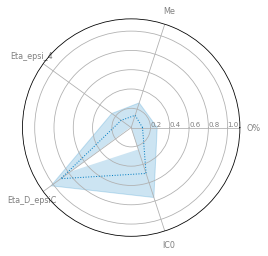

In [9]:
create_plot(desc_lhv, ['O%', 'Me', 'Eta_epsi_4', 'Eta_D_epsiC', 'IC0'], filename='plots/radar/lhv_base.png')

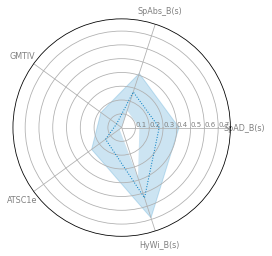

In [10]:
create_plot(desc_fp, ['SpAD_B(s)', 'SpAbs_B(s)', 'GMTIV', 'ATSC1e', 'HyWi_B(s)'], filename='plots/radar/fp_base.png')

In [11]:
from csv import DictReader

with open('mols_to_predict.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

smiles_new = [r['SMILES'] for r in rows]

In [12]:
desc_cn_new = [smiles_to_descriptors(smi, ['SpMaxA_EA(ed)', 'PHI', 'X5Av', 'S3K', 'SssCH2'], False) for smi in smiles_new]
desc_ysi_new = [smiles_to_descriptors(smi, ['SM6_B(p)', 'SpMax1_Bh(p)', 'piPC05', 'piID', 'piPC04'], False) for smi in smiles_new]
desc_kv_new = [smiles_to_descriptors(smi, ['SsOH', 'Psi_i_t', 'SpPos_B(s)', 'VE1sign_Dz(p)', 'SpAD_B(s)'], False) for smi in smiles_new]
desc_cp_new = [smiles_to_descriptors(smi, ['VE2sign_Dz(i)', 'GATS2e', 'VE2sign_Dz(m)', 'VE2sign_Dz(e)', 'VE2sign_Dz(Z)'], False) for smi in smiles_new]
desc_lhv_new = [smiles_to_descriptors(smi, ['O%', 'Me', 'Eta_epsi_4', 'Eta_D_epsiC', 'IC0'], False) for smi in smiles_new]
desc_fp_new = [smiles_to_descriptors(smi, ['SpAD_B(s)', 'SpAbs_B(s)', 'GMTIV', 'ATSC1e', 'HyWi_B(s)'], False) for smi in smiles_new]

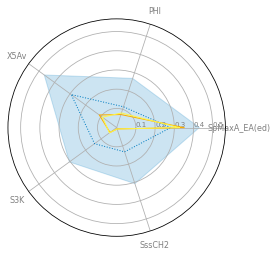

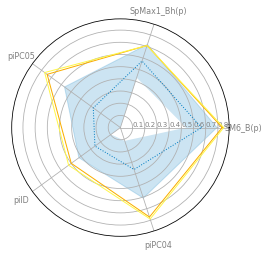

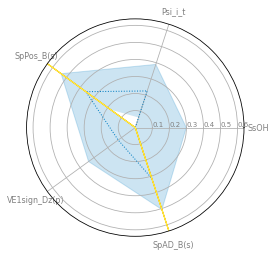

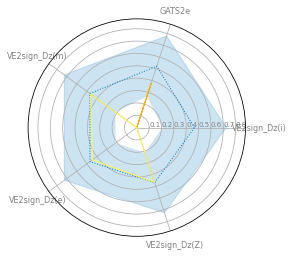

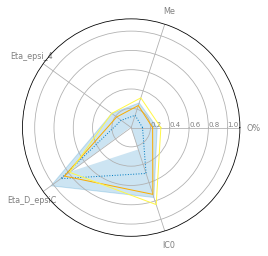

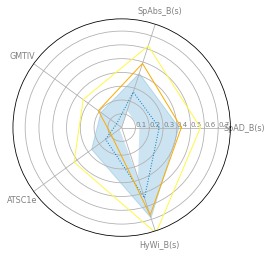

In [13]:
create_plot(desc_cn, ['SpMaxA_EA(ed)', 'PHI', 'X5Av', 'S3K', 'SssCH2'], desc_cn_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/cn_overlay.png')

create_plot(desc_ysi, ['SM6_B(p)', 'SpMax1_Bh(p)', 'piPC05', 'piID', 'piPC04'], desc_ysi_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/ysi_overlay.png')

create_plot(desc_kv, ['SsOH', 'Psi_i_t', 'SpPos_B(s)', 'VE1sign_Dz(p)', 'SpAD_B(s)'], desc_kv_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/kv_overlay.png')

create_plot(desc_cp, ['VE2sign_Dz(i)', 'GATS2e', 'VE2sign_Dz(m)', 'VE2sign_Dz(e)', 'VE2sign_Dz(Z)'], desc_cp_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/cp_overlay.png')

create_plot(desc_lhv, ['O%', 'Me', 'Eta_epsi_4', 'Eta_D_epsiC', 'IC0'], desc_lhv_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/lhv_overlay.png')

create_plot(desc_fp, ['SpAD_B(s)', 'SpAbs_B(s)', 'GMTIV', 'ATSC1e', 'HyWi_B(s)'], desc_fp_new, [
    (230/235, 159/235, 0/235),
    (235/235, 228/235, 66/235)
], filename='plots/radar/fp_overlay.png')